# Manoeuvres d'un satellite

**Modélisation Numérique en Physique - S2**

**ARGUELLO Camilo**

**SINNATHAMBY Thushara**

## Tableau

1. Introduction
2. Trajectoire d'un satellite artificiel
3. Analyse de la vitesse du satellite
4. Analyse du transfert de Hohmann
5. Conclusion

## Partie 1 - Trajectoire d'un satellite artificiel

On cherche à décrire le mouvement d'un satellite, de masse $m_1$, qui tourne autour de la Terre, de masse $ m_2 $.    
Pour étudier ce mouvement, on se place dans un référentiel galiléen, en considérant un problème à un corps. 

On pose **r** le vecteur position du corps 1 (satellite) par rapport au corps 2 (Terre) : $ r = r_1-r_2 $

La seule force qui intervient est le poids (P) auquel est soumis le satellite.      
Le poids du satellite est assimilé à la force d'attraction gravitationnelle $ F_{1/2} $ qu'exerce la Terre sur ce satellite :  
$$ F_{1/2} = -\frac{G.m_1.m_2}{(r_1 - r_2)^3}.(r_1 - r_2) $$

On introduit la masse réduite : $$ µ = \frac{m_1.m_2}{(m_1+m_2)^3} $$

Et la masse totale : $$ M = m_1 + m_2 $$ 

En simplifiant, on obtient la force $$ F_{1/2} = -\frac{G.µ.M}{r^3} $$ 

La deuxième loi de Newton (PFD) permet de poser :

$$ \sum_i \vec{F_i} = m . \vec{a} $$

Alors : $$ F_{1/2} = m_1. \frac{d^2r_1}{dt^2} $$

$$ - F_{2/1} = m_2. \frac{d^2r_2}{dt^2} $$



> A FINIR 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.optimize as op
import pandas as pd

Les solutions aux équations du mouvement pour le satellite sont des orbites elliptiques avec la Terre à un foyer de l'ellipse. La période de l'orbite $T$ est liée au demi-grand axe $a$ de l'ellipse:

$$
T^2 = \frac{4 \pi^2 }{G M} a^3
$$

On considère les mesure de temps en années, la distance en UA (Unités Astronomiques, `1 UA = 1.50e11 m`), ainsi que la rélation selon la troisième loi de Kepler $T^2 = a^3$.

In [2]:
# Global variables
#G = 6.67e-11 # m3 kg-1 s-2
# Assuming that T^2 = a
a = 1 # U.A
T_rev = 1 # ans
G = 4 * np.pi ** 2

In [3]:
# Set initial Position and speed
r_0 = 1.0 # radius orbit
M = 1.0 # Mass 

v = np.sqrt(G * M / r_0)

print(v)

6.283185307179586


<img src="https://textimgs.s3.amazonaws.com/boundless-physics/newton-cannon.svg" style="display:block;margin:auto;width:300px;"/>

Si on suppose que $\vec{r} = (x,y)$, et $\vec{v} = \frac{d \vec{r}}{dt} \rightarrow \vec{v} = (v_x, v_y)$ 

$$

X =

\left[\begin{matrix}
x_0\\
y_0\\
v_{x_0}\\
v_{y_0}\\
\end{matrix}\right]

$$

$$

f(X,t) =

\left[\begin{matrix}
v_x\\
v_y\\
- \frac{GM x}{\left(\sqrt{x^2+y^2}\right)^3} \\
- \frac{GM y}{\left(\sqrt{x^2+y^2}\right)^3} \\
\end{matrix}\right]

$$

In [4]:
def derivee(v,t):
    # Initialisation de la dérivée
    dv = np.empty(v.shape)
    # Dérivée de la vitesse
    dv[0] = v[2]
    dv[1] = v[3]
    r = np.sqrt( v[0] ** 2 + v[1] ** 2 )
    dv[2] = -( G * M * v[0] ) / r ** 3
    dv[3] = -( G * M * v[1] ) / r ** 3

    return dv

In [5]:
# Position initial
x_0 = 1 # AU
y_0 = 0 # AU
# Tangencial Speed
v_x_0 = 0 # AU/year
v_y_0 = 4 # AU/year

# x0, y0, vx0, vy0
X0 = [ x_0, y_0, v_x_0, v_y_0]

t0 = 0.
tf = 2 # 10 years
tau = .00001 # year

In [71]:
def get_mecanic_energy (x,y,vx,vy):
    T = (1/2) * M * (vx ** 2 + vy ** 2)
    U = - G * M / np.sqrt(x ** 2 + y ** 2)
    return T + U

def get_momentum (x,y,vx,vy):
  L = x * vy - y * vx
  return L

def plot_trajectory(x,y, trajectory_type='odeint'):
    plt.title(r'Using ' + trajectory_type + ' with $x$ = %g, $v_y$ = %g, and $step$ = %g' \
      % (x_0,v_y_0,tau))
    plt.plot(x,y)
    centerx = 0.
    centery = 0.
    plt.plot(centerx,centery,'ko')
    plt.axis('equal')
    plt.grid()

def plot_energy(t,E):
  plt.title('Energie Mécanique')
  plt.plot(t,E)
  eps_plot_min = 1.1 * np.min(E)
  plt.axis([np.min(t),np.max(t),eps_plot_min,0])
  plt.ylabel('E/m')
  plt.grid()

def plot_momentum(t,L):
  plt.title('Momentum')
  plt.plot(t,L)
  plt.ylabel('L/m')
  eps_plot_min = 1.1 * np.min(L)
  plt.axis([np.min(t),np.max(t),eps_plot_min,0])
  plt.grid()
  plt.xlabel('t')

def merge_lists(list1, list2):
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list

def get_excentricity(x,y):
  points = merge_lists(x,y)
  distances = [(np.linalg.norm(np.array((p[0],p[1])) - np.array((0,0)))) for p in points]
  apogee = np.max(distances)
  perigee = np.min(distances)
  e = apogee - perigee / apogee + perigee
  return e

def Euler(start, end, step, v_ini, derivee, ordre=4):
    '''
        Application de la méthode d'Euler
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        v[:, i + 1] = v[:, i] + step * derivee(v[:, i], t[i])

    # Argument de sortie
    return t, v

def rk4(start, end, step, v_ini, derivee, ordre=4):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i])
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2)
        d4 = derivee(v[:, i] + step * d3, t[i] + step)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
    return t, v

In [73]:
def calculate_trajectory(x,y,vx,vy,t):
    E = get_mecanic_energy(x,y,vx,vy)
    e = get_excentricity(x,y)
    L = get_momentum(x,y,vx,vy)

    plt.subplot(3,1,1)
    plot_trajectory(x,y,trajectory_type=methode_name)

    plt.subplot(3,1,2)
    plot_energy(t,E)

    plt.subplot(3,1,3)
    plot_momentum(t,L)

    plt.tight_layout(h_pad=.1)
    plt.subplots_adjust(top=1.5)

    plt.show()

    print("L'excentricité de l'orbite =",e)

def thread_odeint():
    t = np.arange(t0, tf, tau)
    X = odeint(derivee, X0, t)
    x = X[:,0] 
    y = X[:,1]
    vx = X[:,2] # values at any given time index
    vy = X[:,3]
    calculate_trajectory(x,y,vx,vy, t)

def thread_experimental(methode):
    t, X = methode(t0, tf, tau, X0, derivee)
    x = X[0,:] 
    y = X[1,:]
    vx = X[2,:] # values at any given time index
    vy = X[3,:]
    calculate_trajectory(x,y,vx,vy, t)

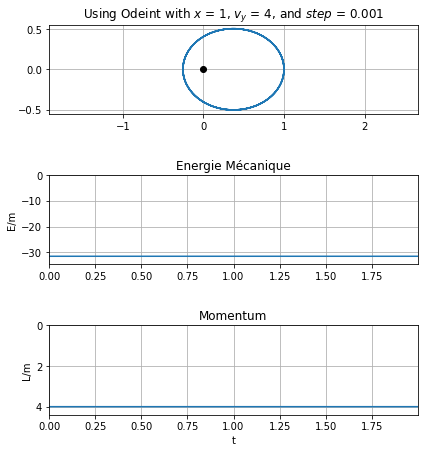

L'excentricité de l'orbite = 1.0


In [79]:
tau = .001 # year

methode_name='Odeint'
thread_odeint()

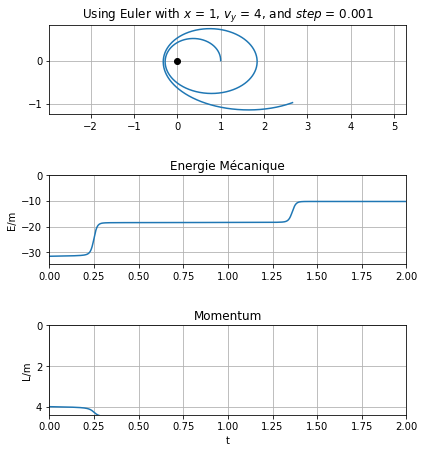

L'excentricité de l'orbite = 3.010708788139758


In [80]:
tau = .001 # year

methode_name='Euler'
thread_experimental(Euler)

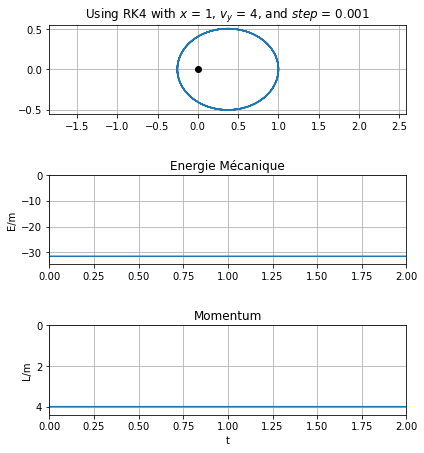

L'excentricité de l'orbite = 1.0


In [81]:
tau = .001 # year

methode_name='RK4'
thread_experimental(rk4)

$$
E = T + U
$$

Avec $T$ = énergie cinétique, $U$ = énergie potentielle

$$
E = \frac{1}{2} m \vec{v}^2 + \frac{-G M}{\sqrt{x^2+y^2}}
$$

$$
e = \sqrt{1 + \frac{2 E L^2}{m a^2}}
$$


### Trajectoire Elliptique

Le mouvement d'un satellite porsuivre une trajectoire donnée par les sections coniques. On va s'intéresser pour des cas où la trajectoire donne comme résultat une ellipse.

Soient $(d)$ une droite verticale qu'on appel `directrice`, $F$ un point qui n'appartient pas à $(di)$, qu'on appellarait `foyer`, $M$ un `point` sur l'ellipse, et $d$ comme la `distance` de $M$ jusqu'à $F$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Ellipse_foyer_directrice2.svg/660px-Ellipse_foyer_directrice2.svg.png" style="display:block;margin:auto;width:400px" />

À partir de ce raisonnement on peut trouver une rélacion qu'on appel l'`excentricité` $e$.

$$
e = \frac{d(M,F)}{d(M,(d))}
$$

Dans l'ellipse on peut définir les grandeurs présents:

- `a` demi grand axe
- `b` demi petit axe
- `c` distance entre le centre el le foyer
- `h` distance avec la directrice et le foyer
- `e` excentricité $\in [0,1]$ 
- `p` demi lactus rectum

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/EllipseVal.svg/880px-EllipseVal.svg.png" style="display:block;margin:auto;width:400px" >

Dans le plane cartesienne, l'équation de l'ellipse est donné par: 

$$
\left( \frac{x}{a} \right)^2 + \left( \frac{y}{b} \right)^2 = 1
$$

Avec $a \gt b \gt 0 $.

La distance du centre jusqu'à l'une de foyers: 

$$
c = \sqrt{a^2 - b^2} 
$$

L'excentricité $e$:

$$
e = \frac{c}{a} = \frac{ \sqrt{a^2 - b^2} }{a} =  \sqrt{ 1 - \left(\frac{b}{a}\right)^2}
$$

In [ ]:
def calculate_trajectory(e):
    t, M, u, theta, R, X, Y = [], [], [], [], [], [], []
    N = 40
    # Trajectoire
    for i in range(0,N+6):
        t.append(i * T_rev / N)
        M.append(2 * np.pi / T_rev * t[i])
        u.append(float(op.fsolve(lambda x : x - e * np.sin(x) - M[i], 0)))
        # coordonées
        theta.append( 2 * np.arctan((np.sqrt((1+e)/(1-e)) * np.tan(u[i] / 2))))
        R.append(a * (1 - e ** 2) / (1 + e * np.cos(theta[i])))
        ## Cartésiene
        X.append(R[i] * np.cos(theta[i]))
        Y.append(R[i] * np.sin(theta[i]))
    return X, Y

## Partie 2 - Analyse de la vitesse du satellite

## Partie 3 - Analyse du transfert de Hohmann